# **EXERCISES 5**

### _Coded by Alperen KAÇMAZ_


## _10 SciPy_

### Exercise 10.1: Least squares

Generate matrix A ∈ Rm×n with m > n. Also generate some vector b ∈ Rm.

- Now find x = arg minx kAx − bk2.
- Print the norm of the residual.


In [7]:
from scipy.optimize import least_squares as ls
import numpy as np


def finder(A: np.array):
    return np.argmin(A)


A = np.array([[6, 6, 3], [40, 40, 20]]).T
b = np.array([0.5, 0.2, 0.6])
sol = ls(finder, b)
print(sol)


 active_mask: array([0., 0., 0.])
        cost: 0.5
         fun: array([1], dtype=int64)
        grad: array([0., 0., 0.])
         jac: array([[0., 0., 0.]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 1
        njev: 1
  optimality: 0.0
      status: 1
     success: True
           x: array([0.5, 0.2, 0.6])


### Exercise 10.2: Optimization

Find the maximum of the function

- $f(x) = sin^{2}(x − 2) e^{-x^2}$


In [8]:
from scipy import e, optimize


def func(x: int):
    """
    Args:
        x (int): variable of the function

    Returns:
        float: function
    """
    return (np.sin(x-2)**2) * (e**-x**2)


# use the fmin but not find the min value, make a lambda func that takes -func.
sol = optimize.fmin(lambda x: -func(x), 0)
print(sol)


Optimization terminated successfully.
         Current function value: -0.911685
         Iterations: 20
         Function evaluations: 40
[0.21625]


### Exercise 10.3: Pairwise distances

Let `X` be a matrix with $n$ rows and $m$ columns. How can you compute the pairwise distances between every two rows?

As an example application, consider $n$ cities, and we are given their coordinates in two columns.

- Now we want a nice table that tells us for each two cities, how far they are apart.

- Again, make sure you make use of Scipy’s functionality instead of writing your own routine.


In [9]:
from scipy.spatial.distance import cdist, pdist
X = np.random.randint(1, 100, size=(4, 8))

print(str(X)+'\n')
print(str(cdist(X, X, 'euclid'))+'\n')
print(pdist(X, 'euclid'))


[[40 64 62 66 54 21 80 53]
 [51 34 78 78  2 93 22 88]
 [35 85  9 82  1  2 35 14]
 [41  7 33 19 52 47 45 65]]

[[  0.         117.88977903 101.22746663  91.37286249]
 [117.88977903   0.         146.83664393 109.58558299]
 [101.22746663 146.83664393   0.         134.1342611 ]
 [ 91.37286249 109.58558299 134.1342611    0.        ]]

[117.88977903 101.22746663  91.37286249 146.83664393 109.58558299
 134.1342611 ]


## _11 Matplotlib_


### Exercise 11.1: Plotting a function

Plot the function

- $f(x) = sin^{2}(x − 2)e^{−x^2}$
- over the interval [0, 2]. Add proper axis labels, a title, etc.


Text(0, 0.5, 'output value')

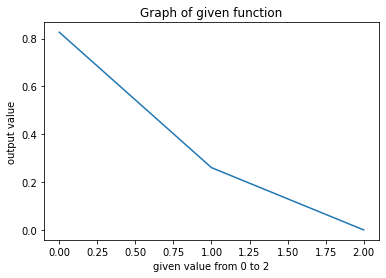

In [10]:
import matplotlib.pyplot as plt


def func(x: int):
    """
    Args:
        x (int): variable of the function

    Returns:
        float: function
    """
    return (np.sin(x-2)**2) * (e**-x**2)


vals = list()
for i in range(0, 3):
    vals.append(func(i))

plt.plot(vals)
plt.title('Graph of given function')
plt.xlabel('given value from 0 to 2')
plt.ylabel('output value')


### Exercise 11.2: Data

Create a data matrix $X$ with 20 observations of 10 variables. Generate a vector $b$ with parameters
Then generate the response vector `y = Xb+z` where $z$ is a vector with standard normally distributed variables.

Now (by only using $y$ and $X$), find an estimator for $b$, by solving

- $b^ˆ = argmin_{b} ||Xb − y||_{2}$
- Plot the true parameters $b$ and estimated parameters $ˆb$. See Figure 1 for an example plot.


In [11]:
X = np.random.randint(0, 100, size=(10, 20))
# b = np.random.randint(0, 100, size=(1, 20))
b = list()
for i in X:
    mean = sum(i)/len(i)
    std = (sum([((x - mean) ** 2) for x in i]) / len(i))**0.5
    z = np.random.normal(mean, std, 1000)
    print(z)
print(b)


[ 64.62080172  90.02007966  34.22694569  24.01420821  -0.62968852
  78.7039692   20.03421421  21.4084293   49.26020573  56.30797864
 -13.62930878  47.47184827  33.6717772   25.79738409  54.5255771
 111.72577006  58.68347581  36.00481003  58.26376054  38.48960022
  65.78378614  61.24686281  84.94965725  49.68312971  69.47489298
 -14.17103457  36.20691618  -6.33739061  32.09490606  67.74780349
  44.92467588  60.49308524  34.3681091   20.86905304  40.03880451
  78.72493804  69.05630888 -27.24861813  61.89073093  41.75266184
  89.00009113  78.20967698  44.28255077  59.25997636  33.50805923
  91.73868557  17.92439483  42.96472118  44.78646951  52.52918026
  59.83085953  36.21283814  83.24809497  17.62886626  64.17038943
  68.79141826  23.88503745  44.40502838  66.3395123   -4.72075068
  59.81852668  48.87951263  43.77308311  99.69379338  72.55700463
  40.70187331  49.63383955  52.43077774  -6.54182303  67.84712493
  67.0451996   70.12993627  48.9760664   62.94164452  91.05839034
  40.424083

### Exercise 11.3: Histogram and density estimation

- Generate a vector z of 10000 observations from your favorite exotic distribution.

- Then make a plot that shows a histogram of z (with 25 bins), along with an estimate for the density, using a Gaussian kernel density estimator (see scipy.stats).

- See Figure 2 for an example plot.


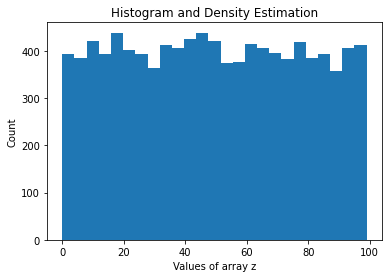

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

z = np.random.randint(0, 100, size=(10000))
density = stats.gaussian_kde(z)

hist = plt.hist(z, bins=25)
plt.title('Histogram and Density Estimation')
plt.xlabel('Values of array z')
plt.ylabel('Count')
plt.show()
